In [1]:
import pandas as pd
import numpy as np
%config InlineBackend.figure_formats = ['svg']

In [4]:
m = pd.read_csv("./mtx_396.csv", index_col=0)

In [7]:
m = m.values

In [8]:
pd.set_option("display.max_rows", 1000)

In [ ]:
m

In [9]:
m = m[34, :]

In [10]:
flat_m = [x for x in m.ravel().tolist() if x != float("inf")]

In [61]:
flat_m.remove(1)

In [62]:
len(flat_m)

395

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

/var/folders/2t/m32pzsyn36x0x6gjjlpl5l0m0000gn/T/ipykernel_39327/352765314.py:8: RuntimeWarning: invalid value encountered in divide
  factor = max([x for x in (factor_hist_b[0]/factor_hist_a[0]) if not np.isnan(x)])


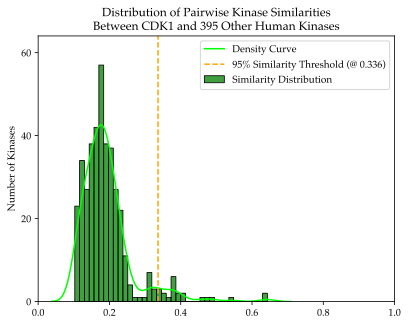

In [65]:
data = flat_m
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.family'] = "P052-Roman"
sns.histplot(data, stat='density', color = "green", label = "Similarity Distribution", bins=40)
cur_y_ticks = plt.yticks()
factor_hist_a = plt.hist(data, color = "violet", bins=40, alpha = 0)
factor_hist_b = plt.hist(data, color = "violet", bins=40, alpha = 0, density = True)
factor = max([x for x in (factor_hist_b[0]/factor_hist_a[0]) if not np.isnan(x)])
sns.kdeplot(data, color = "lime", bw_method = 0.3, label = "Density Curve")
pct = pct = np.percentile(data, 95)
plt.vlines(pct, 0, 100, color = "orange", linestyle = 'dashed', label = f"95% Similarity Threshold (@ {pct:.3})")
plt.title(f"Distribution of Pairwise Kinase Similarities\nBetween CDK1 and {len(flat_m)} Other Human Kinases")
plt.ylabel("Number of Kinases")
plt.yticks([0, 20*factor, 40*factor, 60*factor, 80*factor, 100*factor], [0, 20, 40, 60, 80, 100])
plt.xlim(0, 1)
plt.ylim(0, 12)
plt.legend()
plt.savefig("HistDist.svg", bbox_inches='tight')
plt.show()

In [34]:
plt.yticks()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

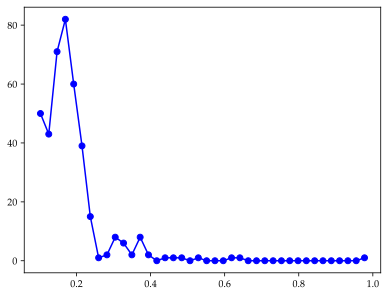

In [57]:
plt.plot(factor_hist_a[1][:-1], factor_hist_a[0], "bo-")
plt.show()

In [210]:
b = sns.histplot(data, stat='count', color = "#2233AA")

In [290]:
mpl.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
        n.append(y1-y0)
        bins.append(x0) # left edge of each bin
    bins.append(x1) # also get right edge of last bin

    return n,bins